## Question 5 – Programming (40 points):
In this programming problem, you will get familiar with building a neural network using backpropagation. You are supposed to implement the following steps:
- Step 1: use our “titanic” dataset in homework #3, and split data in the same way you did in homework #3 – 80% as training and 20% test sets;
- Step 2: Fit a neural network using independent variables ‘pclass + sex + age + sibsp’ and dependent variable ‘survived’. Fill in n/a attributes with the average of the same attributes from other training examples. Use 2 hidden layers and set the activation functions for both the hidden and output layer to be the sigmoid function. Set “solver” parameter as either SGD (stochastic gradient descend) or Adam (similar to SGD but optimized performance with mini batches). You can adjust parameter “alpha” for regularization (to control overfitting) and other parameters such as “learning rate” and “momentum” as needed.
- Step 3: Check the performance of the model with out-of- sample accuracy, defined as out-of-sample percent survivors correctly predicted (on test set), out-of-sample percent fatalities correctly predicted (on test set)
Please try two different network structures (i.e., number of neurons at each hidden layer) and show their respective accuracy.
- Step 4: Compare the out-of-sample accuracy (as defined in step 3) with the random forest obtained in homework #3. (You can either use a table or plot the results of the two algorithms in one figure). Explain any difference in accuracy.
+ Note: There are two options to implement the neural network:
- Option 1: use scikit-learn library;
Here is the tutorial: http://scikit-learn.org/stable/modules/neural_networks_supervised.html
- Option 2 (bonus: 2 points): implement backpropagation yourself; in your implementation, you better set the following:
(1) the initial weights to be uniformly between [-0.1, +0.1]  
(2) the number of iterations to be around 5000 or more (but not tens of thousand) 
You can choose either option for this homework. You will get 5 bonus points if you choose option 2. No matter what you choose, make sure you know how to update the weights.

In [1]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid') 
%matplotlib inline
import matplotlib as mpl
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import precision_score, recall_score

In [2]:
data = pd.read_csv("Titanic.csv")
data.head(5)

,Unnamed: 0,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1st,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.337494,B5,Southampton,2,NaN,"St Louis, MO"
1,2,1st,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.550003,C22 C26,Southampton,11,NaN,"Montreal, PQ / Chesterville, ON"
2,3,1st,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.550003,C22 C26,Southampton,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,4,1st,0,"Allison, Mr. Hudson Joshua Crei",male,30.0000,1,2,113781,151.550003,C22 C26,Southampton,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,5,1st,0,"Allison, Mrs. Hudson J C (Bessi",female,25.0000,1,2,113781,151.550003,C22 C26,Southampton,NaN,NaN,"Montreal, PQ / Chesterville, ON"


# Step 1: 


In [3]:
# Take a random 80% samples for training and the rest 20% for test

train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

print(f"Train dataset with {len(train_data)} instances and Test dataset with {len(test_data)} instances")


Train dataset with 1047 instances and Test dataset with 262 instances


In [4]:
print("Train Data: ")
train_data.head(5)

Train Data: 


,Unnamed: 0,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
772,773,3rd,0,"Dika, Mr. Mirko",male,17.0,0,0,349232,7.895800,NaN,Southampton,NaN,NaN,NaN
543,544,2nd,0,"Reeves, Mr. David",male,36.0,0,0,C.A. 17248,10.500000,NaN,Southampton,NaN,NaN,"Brighton, Sussex"
289,290,1st,1,"Taussig, Miss. Ruth",female,18.0,0,2,110413,79.650002,E68,Southampton,8,NaN,"New York, NY"
10,11,1st,0,"Astor, Col. John Jacob",male,47.0,1,0,PC 17757,227.524994,C62 C64,Cherbourg,NaN,124.0,"New York, NY"
147,148,1st,0,"Harrington, Mr. Charles H",male,NaN,0,0,113796,42.400002,NaN,Southampton,NaN,NaN,NaN


In [5]:
print("Test Data: ")
test_data.head(5)

Test Data: 


,Unnamed: 0,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1148,1149,3rd,0,"Rintamaki, Mr. Matti",male,35.0,0,0,STON/O 2. 3101273,7.1250,NaN,Southampton,NaN,NaN,NaN
1049,1050,3rd,1,"Nakid, Mr. Sahid",male,20.0,1,1,2653,15.7417,NaN,Cherbourg,C,NaN,NaN
982,983,3rd,0,"Lyntakoff, Mr. Stanko",male,NaN,0,0,349235,7.8958,NaN,Southampton,NaN,NaN,NaN
808,809,3rd,0,"Ford, Mr. Arthur",male,NaN,0,0,A/5 1478,8.0500,NaN,Southampton,NaN,NaN,"Bridgwater, Somerset, England"
1195,1196,3rd,0,"Shaughnessy, Mr. Patrick",male,NaN,0,0,370374,7.7500,NaN,Queenstown,NaN,NaN,NaN


# Step 2 + Step 3:

In [6]:
for i in train_data.columns:
    if train_data[i].dtype == object:
        # print(i)
        train_data[i].fillna(train_data[i].mode()[0], inplace=True)
    else:
        train_data[i].fillna(train_data[i].mean(), inplace=True)
print(train_data.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1047 entries, 772 to 1126
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1047 non-null   int64  
 1   pclass      1047 non-null   object 
 2   survived    1047 non-null   int64  
 3   name        1047 non-null   object 
 4   sex         1047 non-null   object 
 5   age         1047 non-null   float64
 6   sibsp       1047 non-null   int64  
 7   parch       1047 non-null   int64  
 8   ticket      1047 non-null   object 
 9   fare        1047 non-null   float64
 10  cabin       1047 non-null   object 
 11  embarked    1047 non-null   object 
 12  boat        1047 non-null   object 
 13  body        1047 non-null   float64
 14  home.dest   1047 non-null   object 
dtypes: float64(3), int64(4), object(8)
memory usage: 130.9+ KB
None


In [7]:
for i in test_data.columns:
    if test_data[i].dtype == object:
        # print(i)
        test_data[i].fillna(test_data[i].mode()[0], inplace=True)
    else:
        test_data[i].fillna(test_data[i].mean(), inplace=True)
print(test_data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 262 entries, 1148 to 199
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  262 non-null    int64  
 1   pclass      262 non-null    object 
 2   survived    262 non-null    int64  
 3   name        262 non-null    object 
 4   sex         262 non-null    object 
 5   age         262 non-null    float64
 6   sibsp       262 non-null    int64  
 7   parch       262 non-null    int64  
 8   ticket      262 non-null    object 
 9   fare        262 non-null    float64
 10  cabin       262 non-null    object 
 11  embarked    262 non-null    object 
 12  boat        262 non-null    object 
 13  body        262 non-null    float64
 14  home.dest   262 non-null    object 
dtypes: float64(3), int64(4), object(8)
memory usage: 32.8+ KB
None


In [8]:
ordinal_encoder = OrdinalEncoder()
train_data["pclass"] = ordinal_encoder.fit_transform(train_data[["pclass"]])
train_data["sex"] = ordinal_encoder.fit_transform(train_data[["sex"]])
test_data["pclass"] = ordinal_encoder.fit_transform(test_data[["pclass"]])
test_data["sex"] = ordinal_encoder.fit_transform(test_data[["sex"]])

train_output = train_data[["survived"]]
train_input = train_data[["pclass","sex","age","sibsp"]]
test_output = test_data[["survived"]]
test_input = test_data[["pclass","sex","age","sibsp"]]


## Option 2: implement backpropagation by myselt

In [9]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))
def y_predict(x, w1, w2, w3):
    x = np.c_[np.ones((len(x), 1)), x]
    a1 = sigmoid(np.dot(x,w1))
    a1_b = np.c_[np.ones((len(a1), 1)), a1]
    a2 = sigmoid(np.dot(a1_b, w2))
    a2_b = np.c_[np.ones((len(a2), 1)), a2]
    y_pred_pro = sigmoid(np.dot(a2_b,w3))
    y_pred = np.where(y_pred_pro>=0.5,1,0)
    return y_pred

In [21]:
def stochatistic_gradient_descent(x,y,w1,w2,w3,learning_rate, alpha):
    
    n = len(x)
    # to generate the momentum
    velocity_w1 = np.zeros_like(w1)
    velocity_w2 = np.zeros_like(w2)
    velocity_w3 = np.zeros_like(w3)
    x = np.c_[np.ones((len(x), 1)), x]
    for j in range(n):
        random_example = np.random.randint(n)
        x_j = x[random_example:random_example+1]
        t_j = y[random_example:random_example+1]
        a1 = sigmoid(np.dot(x_j,w1))
        a1_b = np.c_[np.ones((len(a1), 1)), a1]
        a2 = sigmoid(np.dot(a1_b,w2))
        a2_b = np.c_[np.ones((len(a2), 1)), a2]
        y_pred = sigmoid(np.dot(a2_b,w3))
        d_Ej =  -(t_j-y_pred).reshape(1, -1)
        delta_w3 = np.dot(a2_b.T,d_Ej)
        d_a2 = np.dot(d_Ej, w3[1:,:].T) * a2 * (1 - a2)
        delta_w2 = np.dot(a1_b.T,d_a2)
        d_a1 = np.dot(d_a2, w2[1:,:].T) * a1 * (1 - a1)
        delta_w1 = np.dot(x_j.reshape(1, -1).T, d_a1)
        
        velocity_w3 = alpha * velocity_w3 - learning_rate * delta_w3
        velocity_w2 = alpha* velocity_w2 - learning_rate * delta_w2
        velocity_w1 = alpha * velocity_w1 - learning_rate * delta_w1
        w3 += velocity_w3
        w2 += velocity_w2
        w1 += velocity_w1
       

    return w1, w2, w3

In [29]:
input_size = train_input.shape[1]
hidden1_size = 10
hidden2_size = 5
output_size = 1
alpha = 0.01

input_layer = np.array(train_input)
truth_output = np.array(train_output)
w1 = np.random.uniform(low=-0.1, high=0.1, size=(input_size+1, hidden1_size))
w2 = np.random.randn(hidden1_size+1, hidden2_size)
w3 = np.random.randn(hidden2_size+1, 1)

num_iters = 5000

error_train_sto = []

w1_sto = np.copy(w1)
w2_sto = np.copy(w2)
w3_sto = np.copy(w3)
learning_rate = 0.001

for i in range(num_iters):
    w1_sto, w2_sto, w3_sto = stochatistic_gradient_descent\
    (input_layer,truth_output,w1_sto,w2_sto,w3_sto,learning_rate,alpha)


In [30]:
y_pred_1 = y_predict(test_input, w1_sto, w2_sto, w3_sto)
recal_SGD_1 = recall_score(test_output, y_pred_1, average=None)

print(f"The percent survivors correctly predicted (on test set) is {(recal_SGD_1[1]*100).round(2)}%")
print(f"The percent fatalities correctly predicted (on test set) is {(recal_SGD_1[0]*100).round(2)}%")

The percent survivors correctly predicted (on test set) is 49.15%
The percent fatalities correctly predicted (on test set) is 95.14%


In [31]:
input_size = train_input.shape[1]
hidden1_size = 5
hidden2_size = 3
output_size = 1
alpha = 0.001

input_layer = np.array(train_input)
truth_output = np.array(train_output)
w1 = np.random.uniform(low=-0.1, high=0.1, size=(input_size+1, hidden1_size))
w2 = np.random.randn(hidden1_size+1, hidden2_size)
w3 = np.random.randn(hidden2_size+1, 1)

num_iters = 5000

error_train_sto = []

w1_sto = np.copy(w1)
w2_sto = np.copy(w2)
w3_sto = np.copy(w3)
learning_rate = 0.001

for i in range(num_iters):
    w1_sto, w2_sto, w3_sto = stochatistic_gradient_descent\
    (input_layer,truth_output,w1_sto,w2_sto,w3_sto,learning_rate,alpha)

In [32]:
y_pred_2 = y_predict(test_input, w1_sto, w2_sto, w3_sto)
recal_SGD_2 = recall_score(test_output, y_pred_2, average=None)

print(f"The percent survivors correctly predicted (on test set) is {(recal_SGD_2[1]*100).round(2)}%")
print(f"The percent fatalities correctly predicted (on test set) is {(recal_SGD_2[0]*100).round(2)}%")

The percent survivors correctly predicted (on test set) is 66.1%
The percent fatalities correctly predicted (on test set) is 88.19%


## Option 1: use scikit-learn library

In [45]:
clf = MLPClassifier(hidden_layer_sizes=(3, 3), activation='logistic', solver='adam',max_iter=1000, alpha=0.0001,learning_rate_init=0.001,random_state=1)
clf = clf.fit(train_input, np.ravel(train_output))
y_hat_1 = clf.predict(test_input)

recal_clf_1 = recall_score(test_output, y_hat_1, average=None)


print(f"The percent survivors correctly predicted (on test set) is {(recal_clf_1[1]*100).round(2)}%")
print(f"The percent fatalities correctly predicted (on test set) is {(recal_clf_1[0]*100).round(2)}%")

The percent survivors correctly predicted (on test set) is 59.32%
The percent fatalities correctly predicted (on test set) is 90.28%


In [46]:
clf = MLPClassifier(hidden_layer_sizes=(5, 2), activation='logistic', solver='adam',max_iter=1000, alpha=0.0001,learning_rate_init=0.001,random_state=1)
clf = clf.fit(train_input, np.ravel(train_output))
y_hat_2 = clf.predict(test_input)
recal_clf_2 = recall_score(test_output, y_hat_2, average=None)


print(f"The percent survivors correctly predicted (on test set) is {(recal_clf_2 [1]*100).round(2)}%")
print(f"The percent fatalities correctly predicted (on test set) is {(recal_clf_2 [0]*100).round(2)}%")

The percent survivors correctly predicted (on test set) is 54.24%
The percent fatalities correctly predicted (on test set) is 93.75%


## Step 4:

In [67]:
random_for = RandomForestClassifier(n_estimators = 50,max_leaf_nodes = 32, n_jobs=-1, random_state=42)
random_for.fit(train_input,np.ravel(train_output))

output_pred_fore = random_for.predict(test_input)
recal_fore = recall_score(test_output, output_pred_fore, average=None)

index = ["Random Forest","NN-Scikit-Mod 1","NN-Scikit-Mod 2",\
         "NN-Me-Mod 1","NN-Me-Mod 2"]

table_value = np.array([(recal_fore*100).round(2),(recal_clf_1*100).round(2),(recal_clf_2*100).round(2),\
                        (recal_SGD_1*100).round(2),(recal_SGD_2*100).round(2)])
df = pd.DataFrame(table_value, \
                  columns = ["Survivors correctly predicted (%)","Fatalities correctly predicted (%)"],
                  index = index)
accur_sco = [(accuracy_score(test_output, output_pred_fore)*100).round(2),\
             (accuracy_score(test_output, y_hat_1)*100).round(2),\
             (accuracy_score(test_output, y_hat_2)*100).round(2),\
             (accuracy_score(test_output, y_pred_1)*100).round(2),\
             (accuracy_score(test_output, y_pred_2)*100).round(2)]

df.insert(2,"Accuracy score",accur_sco)
df

,Survivors correctly predicted (%),Fatalities correctly predicted (%),Accuracy score
Random Forest,92.36,53.39,74.81
NN-Scikit-Mod 1,90.28,59.32,76.34
NN-Scikit-Mod 2,93.75,54.24,75.95
NN-Me-Mod 1,95.14,49.15,74.43
NN-Me-Mod 2,88.19,66.10,78.24


<AxesSubplot:>

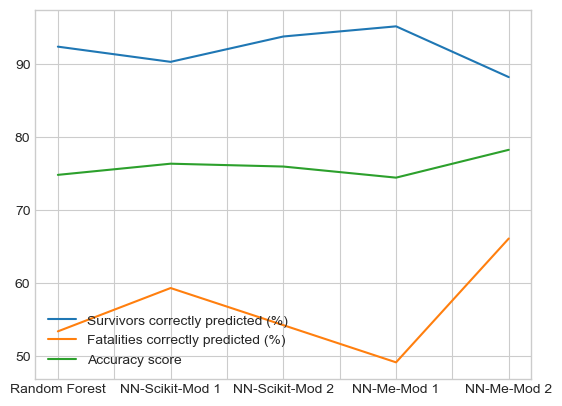

In [68]:
df.plot()

- Based on the table and graph, we can see the accuracy in Newral Networks NN-Scikit-Mod 1 shows slightly better than Random Forest model. Otherwise, in the other models, if Survivors correctly predicted higher than Random Forest model, Fatalities correctly predicted will be lower, and vice versa.
- For Accuracy score, Random Forest model is almost lower than the other NN models